In [73]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

1. Reconhecimento de Padrões

- Objetivo: Implemente um algoritmo genético para o exemplo de reconhecimento de 
padrões apresentado em aula.

- Descrição: Em vez de reconhecer o número 1, o algoritmo deve reconhecer o número 0, representado pela bitstring: [1 1 1 1 0 1 1 0 1 1 1 1].

- Tarefas: 
    -  Verifique, em média, quantas gerações são necessárias para atingir o alvo. 
    - Teste diferentes taxas de crossover e mutação, comparando os resultados. 
    - Realize experimentos utilizando apenas crossover e apenas mutação, e compare os resultados obtidos.


In [2]:
class GeneticAlgorithm:
    def __init__(
            self, 
            target, 
            population_size=100,
            mutation_rate=0.01,
            crossover_rate=0.7,
            generations=100,
            log = True
        ):
        """
        Algoritmo Genético para evoluir bitstrings em direção a um padrão alvo.
        :param target: Bitstring alvo como uma lista ou numpy array de 0s e 1s
        :param population_size: Número de indivíduos na população
        :param mutation_rate: Probabilidade de inverter cada bit durante a mutação
        :param crossover_rate: Probabilidade de realizar crossover entre dois pais
        :param generations: Número de gerações para executar o AG
        """
        self.target = np.array(target)
        self.n_bits = len(target)
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.population = self._init_population()
        self.log = log

    def _init_population(self):
        # Inicializa com uma população aleatória de 0 e 1
        return np.random.randint(2, size=(self.population_size, self.n_bits))

    def _fitness(self, individual):
        # Fitness é o número de bits que batem com o alvo
        return np.sum(individual == self.target)

    def _select_parent(self, fitnesses):
        # Seleção de roleta baseando no Fitness
        total_fit = np.sum(fitnesses)
        if total_fit == 0:
            return self.population[random.randrange(self.population_size)]
        pick = random.uniform(0, total_fit)
        current = 0
        for idx, fit in enumerate(fitnesses):
            current += fit
            if current >= pick:
                return self.population[idx]
        return self.population[-1]

    def _crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            point = random.randrange(1, self.n_bits)
            child1 = np.concatenate([parent1[:point], parent2[point:]])
            child2 = np.concatenate([parent2[:point], parent1[point:]])
            return child1, child2
        return parent1.copy(), parent2.copy()

    def _mutate(self, individual):
        for i in range(self.n_bits):
            if random.random() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self):
        history = []
        for gen in range(self.generations):
            fitnesses = np.array([self._fitness(ind) for ind in self.population])
            best_idx = np.argmax(fitnesses)
            best_fit = fitnesses[best_idx]
            best_ind = self.population[best_idx]
            history.append((gen, best_fit, best_ind.copy()))

            # Para a execução do algoritmo mais cedo se encontra um match
            if best_fit == self.n_bits:
                if self.log:
                    print(f"Geração {gen}: Match perfeito encontrado: {best_ind}")
                break

            # Cria nova população
            new_pop = []
            while len(new_pop) < self.population_size:
                p1 = self._select_parent(fitnesses)
                p2 = self._select_parent(fitnesses)
                c1, c2 = self._crossover(p1, p2)
                new_pop.append(self._mutate(c1))
                if len(new_pop) < self.population_size:
                    new_pop.append(self._mutate(c2))
            self.population = np.array(new_pop)

            # Printa o progresso a cada 10 gerações
            if gen % 10 == 0:
                if self.log:
                    print(f"Geração {gen}: Melhor fitness = {best_fit}, Individual = {best_ind}")

        return history


In [37]:
if __name__ == "__main__":
    # Define a bitstring alvo para o número 0
    # 1, 1, 1
    # 1, 0, 1
    # 1, 0, 1
    # 1, 1, 1
    target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]

    ga = GeneticAlgorithm(target=target_pattern,
                          population_size=200,
                          mutation_rate=0.02,
                          crossover_rate=0.7,
                          generations=200)
    history = ga.run()

    # Show final result
    gen, fit, indiv = history[-1]
    print(f"Finalizado na geração {gen} com Fitness {fit} e individual {indiv}")
    print(history[-1])

Geração 0: Melhor fitness = 10, Individual = [1 1 1 0 0 1 1 0 1 0 1 1]
Geração 1: Match perfeito encontrado: [1 1 1 1 0 1 1 0 1 1 1 1]
Finalizado na geração 1 com Fitness 12 e individual [1 1 1 1 0 1 1 0 1 1 1 1]
(1, np.int64(12), array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]))


Em média, quantas gerações são necessárias para atingir o alvo?

R: Em média são necessárias 7,11 gerações

Média de gerações necessárias: 6.89
Minímo: 0.00
Máximo: 19.00


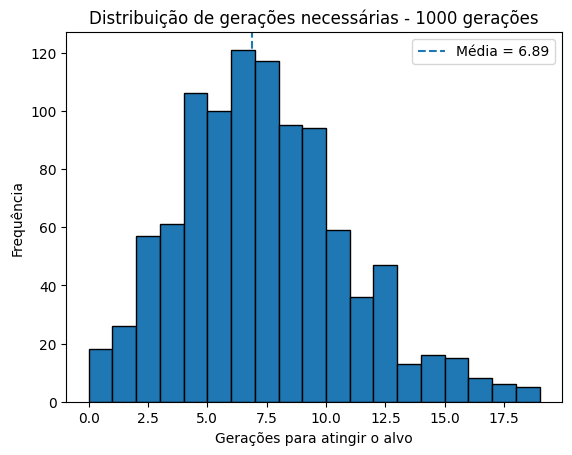

In [ ]:
# Parâmetros e execução de múltiplas rodadas
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
n_runs = 1_000
generations_required = []

for _ in range(n_runs):
    ga = GeneticAlgorithm(target=target_pattern, log=False)
    gens = ga.run()
    generations_required.append(gens[-1][0]) # pega apenas a última geração criada e apenas o número de gerações

# Cálculo da média
average_gens = np.mean(generations_required)
min = np.min(generations_required)
max = np.max(generations_required)
print(f"Média de gerações necessárias: {average_gens:.2f}")
print(f"Minímo: {min:.2f}")
print(f"Máximo: {max:.2f}")

# Plotagem
plt.figure()
plt.hist(generations_required, bins='auto', edgecolor='black', linewidth=1)
plt.axvline(average_gens, linestyle='dashed', label=f'Média = {average_gens:.2f}')
plt.xlabel('Gerações para atingir o alvo')
plt.ylabel('Frequência')
plt.title(f'Distribuição de gerações necessárias - {n_runs} execuções')
plt.legend()
plt.show()

Teste diferentes taxas de crossover e mutação, comparando os resultados.

R: Aparentemente, quanto maior a taxa de crossover e taxa de mutação, menor a quantidade de gerações necessárias para atingir o alvo.

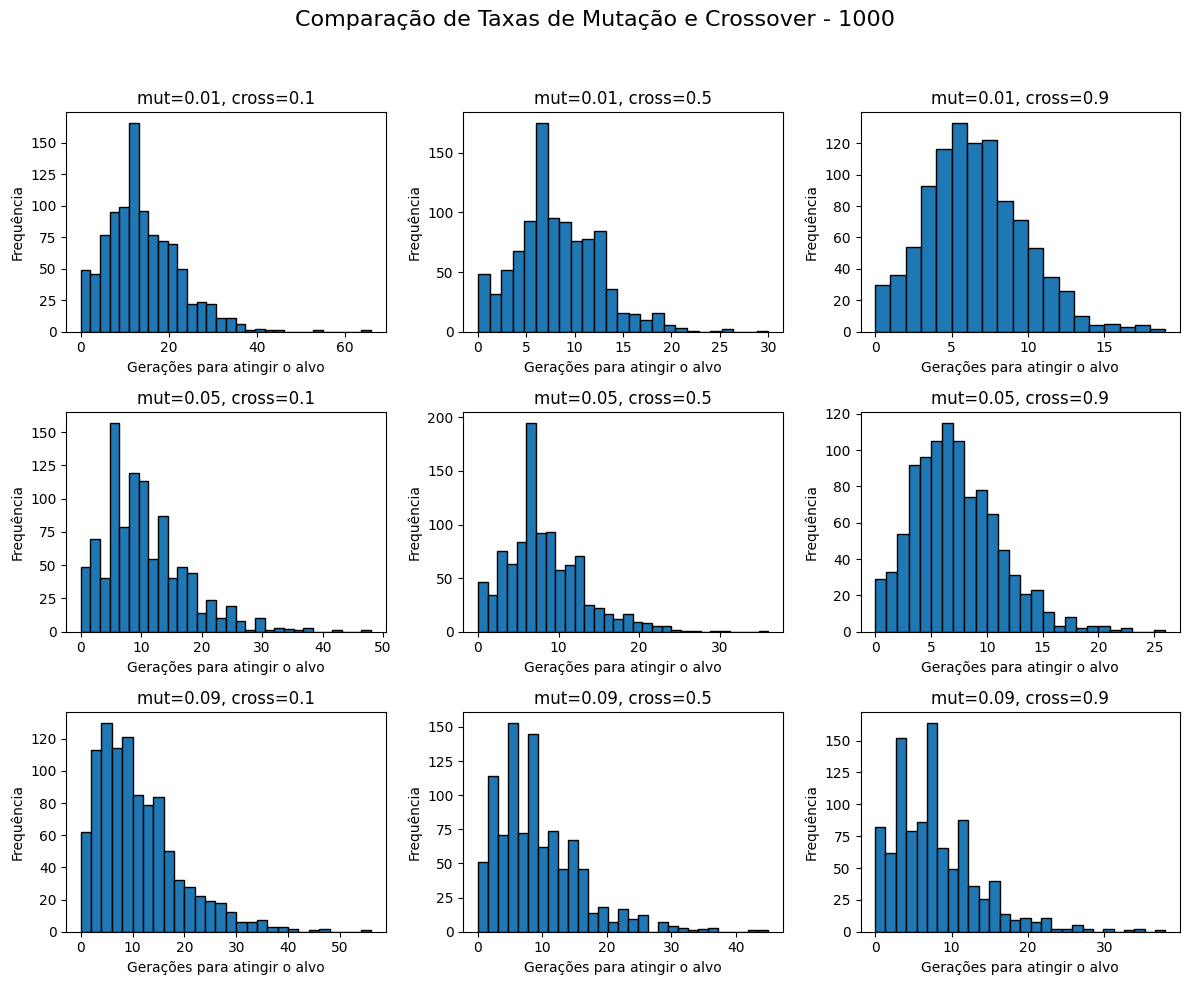

In [ ]:
# Parâmetros de teste
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates = [0.01, 0.05, 0.09]
crossover_rates = [0.1, 0.5, 0.9]
n_runs = 1_000

# Execução dos testes
results = {}
for m in mutation_rates:
    for c in crossover_rates:
        gens_list = []
        for _ in range(n_runs):
            ga = GeneticAlgorithm(target_pattern, mutation_rate=m, crossover_rate=c, log=False)
            runned = ga.run()
            gens_list.append(runned[-1][0]) # pega apenas a última geração criada e apenas o número de gerações
        results[(m, c)] = gens_list

# Plot dos resultados em subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle(f"Comparação de Taxas de Mutação e Crossover - {n_runs}", fontsize=16)

for ax, (m, c) in zip(axes.flatten(), results.keys()):
    ax.hist(results[(m, c)], bins='auto', edgecolor='black', linewidth=1)
    ax.set_title(f"mut={m}, cross={c}")
    ax.set_xlabel("Gerações para atingir o alvo")
    ax.set_ylabel("Frequência")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

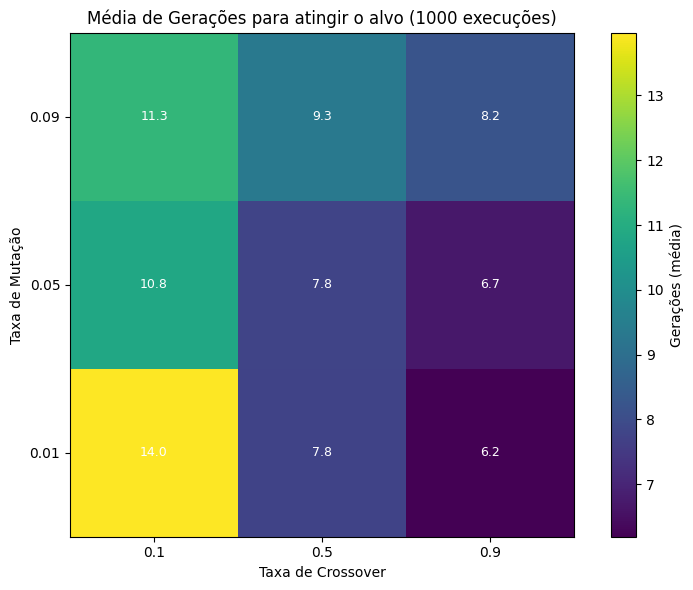

In [3]:
# Parâmetros de teste
target_pattern   = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates   = [0.01, 0.05, 0.09]
crossover_rates  = [0.1, 0.5, 0.9]
n_runs           = 1_000

# Execução dos testes
results = {}
for m in mutation_rates:
    for c in crossover_rates:
        gens_list = []
        for _ in range(n_runs):
            ga = GeneticAlgorithm(target_pattern, mutation_rate=m, crossover_rate=c, log=False)
            runned = ga.run()
            gens_list.append(runned[-1][0])  # última geração
        results[(m, c)] = gens_list

# Monta matriz de médias
means = np.zeros((len(mutation_rates), len(crossover_rates)))
for i, m in enumerate(mutation_rates):
    for j, c in enumerate(crossover_rates):
        means[i, j] = np.mean(results[(m, c)])

# Plot do heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(means, origin='lower', 
               cmap='viridis', interpolation='nearest')

# Ajusta ticks e rótulos
ax.set_xticks(np.arange(len(crossover_rates)))
ax.set_yticks(np.arange(len(mutation_rates)))
ax.set_xticklabels(crossover_rates)
ax.set_yticklabels(mutation_rates)
ax.set_xlabel("Taxa de Crossover")
ax.set_ylabel("Taxa de Mutação")
ax.set_title(f"Média de Gerações para atingir o alvo ({n_runs} execuções)")

# Anotações com valores
for i in range(len(mutation_rates)):
    for j in range(len(crossover_rates)):
        ax.text(j, i, f"{means[i, j]:.1f}",
                ha="center", va="center", color="white", fontsize=9)

# Barra de cores
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Gerações (média)")

plt.tight_layout()
plt.show()


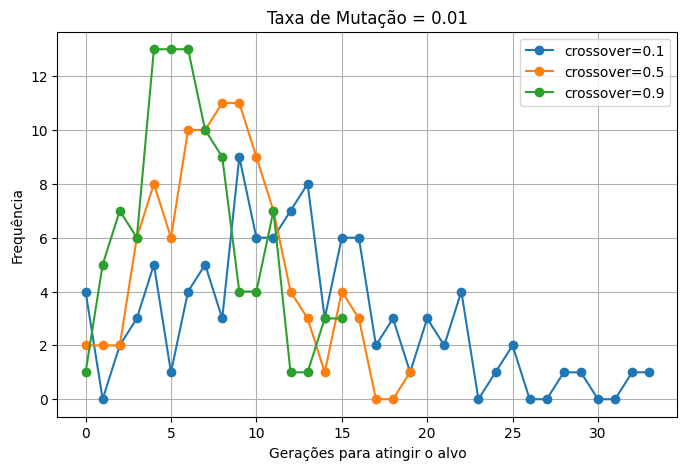

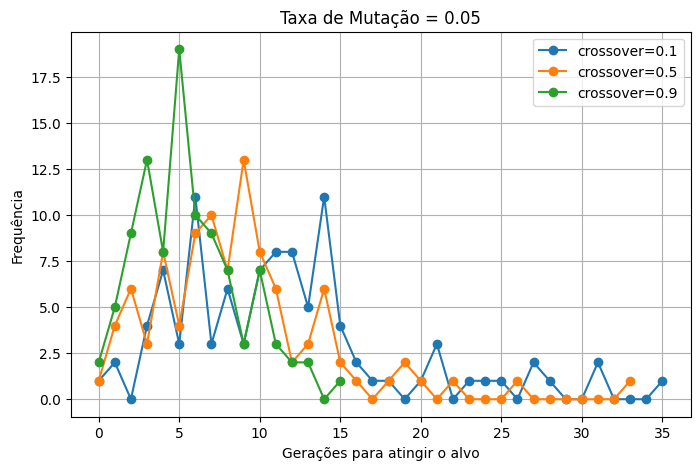

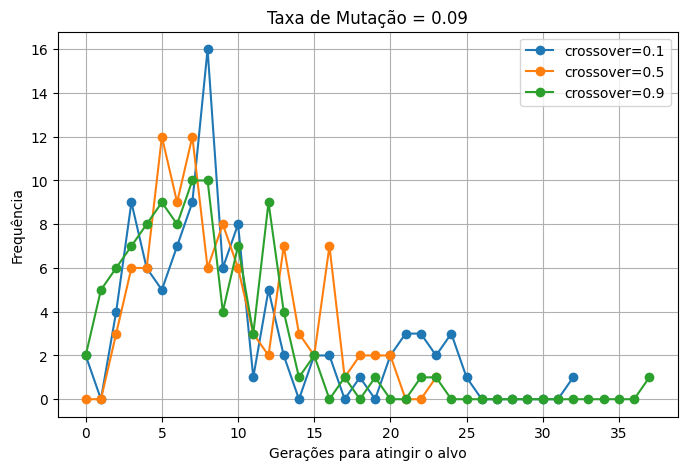

In [ ]:
# Parâmetros e execuções
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates = [0.01, 0.05, 0.09]
crossover_rates = [0.1, 0.5, 0.9]
n_runs = 1_000

results = {}
for m in mutation_rates:
    for c in crossover_rates:
        gens_list = [
            (GeneticAlgorithm(target_pattern, mutation_rate=m, crossover_rate=c, log=False).run())[-1][0] for _ in range(n_runs)
        ]
        results[(m, c)] = gens_list

# Plot de linhas em gráficos separados
for m in mutation_rates:
    plt.figure(figsize=(8, 5))
    for c in crossover_rates:
        gens_list = results[(m, c)]
        counts = np.bincount(gens_list)
        x = np.arange(len(counts))
        plt.plot(x, counts, marker='o', label=f'crossover={c}')
    plt.title(f'Taxa de Mutação = {m}')
    plt.xlabel('Gerações para atingir o alvo')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()

Exception ignored in: <function tqdm.__del__ at 0x7c92b34a9f80>
Traceback (most recent call last):
  File "/home/tamicktom/Documentos/mestrado/algoritmos-geneticos/.venv/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/tamicktom/Documentos/mestrado/algoritmos-geneticos/.venv/lib/python3.13/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


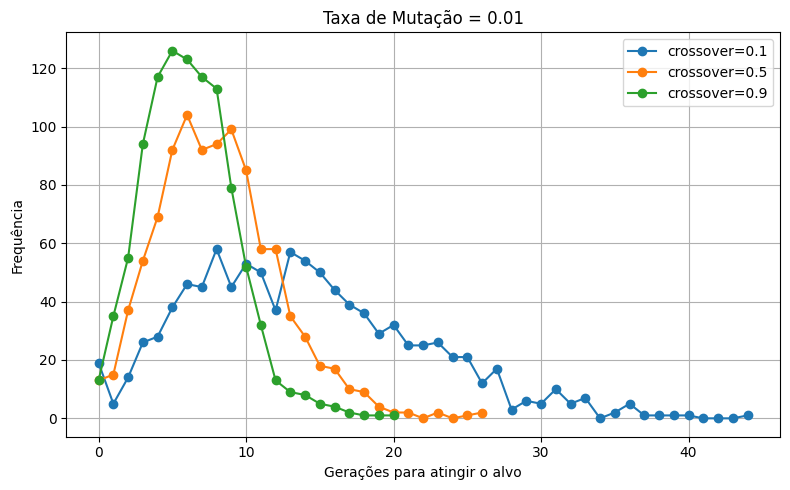

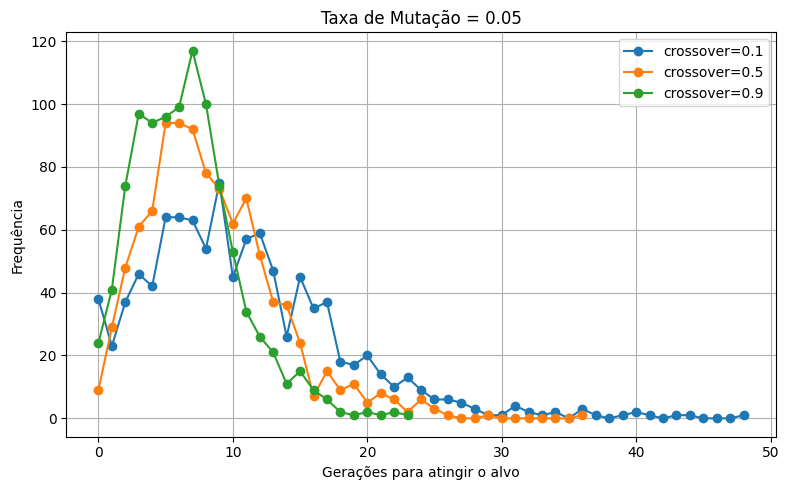

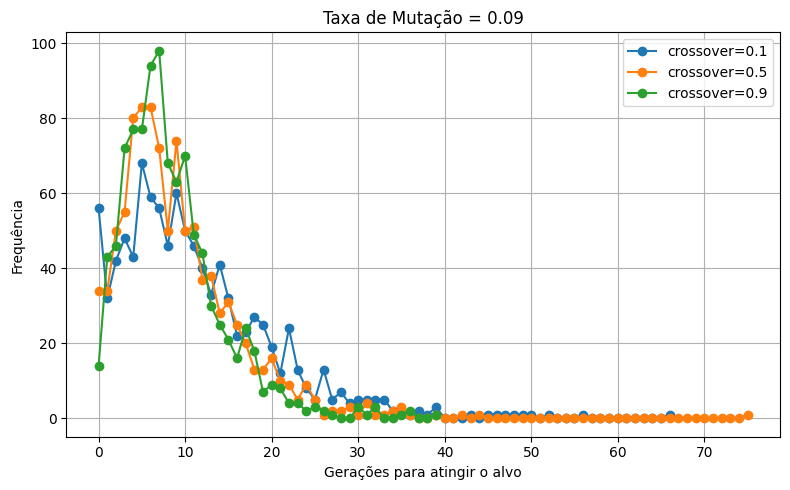

In [75]:
from concurrent.futures import ProcessPoolExecutor, as_completed

# Parâmetros do experimento
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates = [0.01, 0.05, 0.09]
crossover_rates = [0.1, 0.5, 0.9]
n_runs = 1_000

def run_single(params):
    """
    Executa uma única vez o algoritmo genético para um par (mutation_rate, crossover_rate)
    e retorna a geração em que o algoritmo atingiu o alvo.
    """
    m, c = params
    # Executa o GA e obtém o histórico de logs
    history = GeneticAlgorithm(
        target_pattern,
        mutation_rate=m,
        crossover_rate=c,
        log=False
    ).run()
    # history é uma lista de tuplas, onde cada tupla é (geração, outra_info)
    return history[-1][0]

def run_experiments(mutation_rates, crossover_rates, n_runs):
    """
    Executa todas as combinações em paralelo e retorna um dicionário com listas de resultados.
    """
    results = {}
    # Prepara todos os parâmetros para submissão
    all_params = [ (m, c) for m in mutation_rates for c in crossover_rates for _ in range(n_runs) ]

    with ProcessPoolExecutor() as executor:
        # Submete todas as tarefas
        futures = { executor.submit(run_single, p): p for p in all_params }
        for future in as_completed(futures):
            m, c = futures[future]
            gens = future.result()
            results.setdefault((m, c), []).append(gens)
    return results

results = run_experiments(mutation_rates, crossover_rates, n_runs)

# Gera os gráficos
for m in mutation_rates:
    plt.figure(figsize=(8, 5))
    for c in crossover_rates:
        gens_list = results[(m, c)]
        # Usa np.histogram para bins dinamicamente
        min_gen, max_gen = np.min(gens_list), np.max(gens_list)
        counts, bins = np.histogram(gens_list, bins=range(min_gen, max_gen + 2))
        x = bins[:-1]
        plt.plot(x, counts, marker='o', label=f'crossover={c}')

    plt.title(f'Taxa de Mutação = {m}')
    plt.xlabel('Gerações para atingir o alvo')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Realize experimentos utilizando apenas crossover e apenas mutação, e compare os resultados obtidos.

R: No experimento com apenas crossover (mutação desativada, crossover_rate=0.7), a maioria das execuções convergiu em cerca de 5–6 gerações, com média de 4,87 gerações.

Já no cenário de apenas mutação (crossover desativado, mutation_rate=0.02), observamos uma convergência muito mais lenta e dispersa: a média foi de 11,27 gerações, com casos chegando a ultrapassar 20 gerações.

Conclusão: o crossover sozinho é bem mais eficiente em recombinar informação útil do que depender unicamente de mutação para guiar a busca. A mutação isolada tende a explorar o espaço de forma menos direcionada, resultando em maior número de gerações para atingir o alvo. Isso reforça a importância de um bom equilíbrio entre operadores em algoritmos genéticos clássicos.

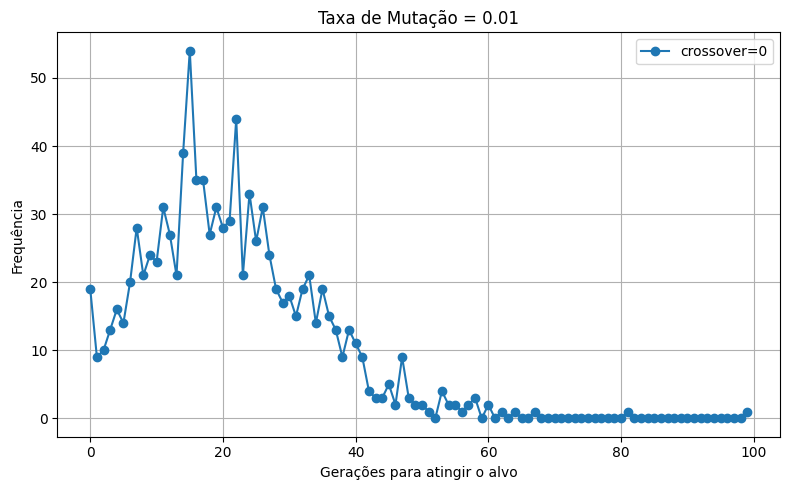

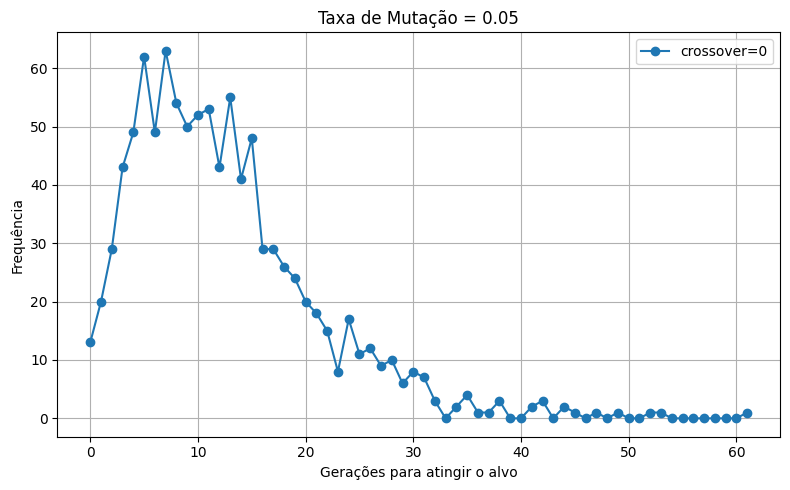

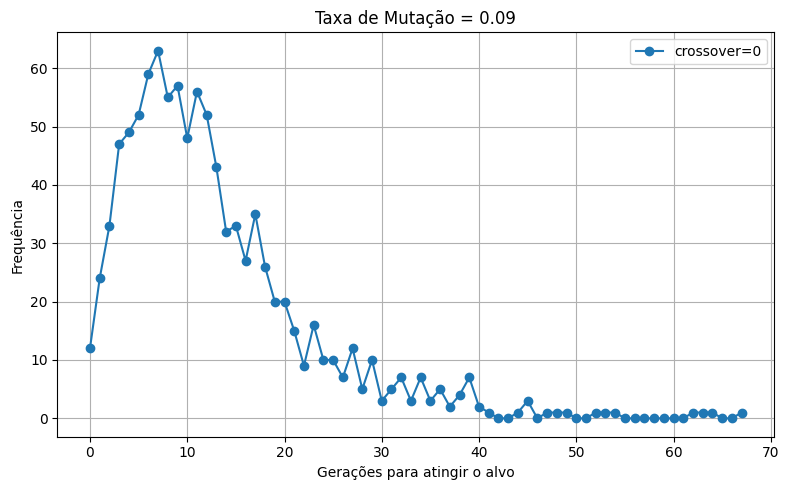

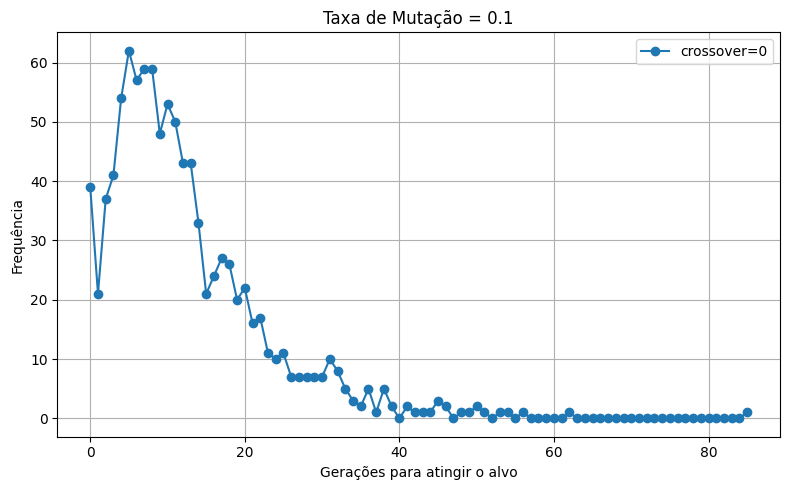

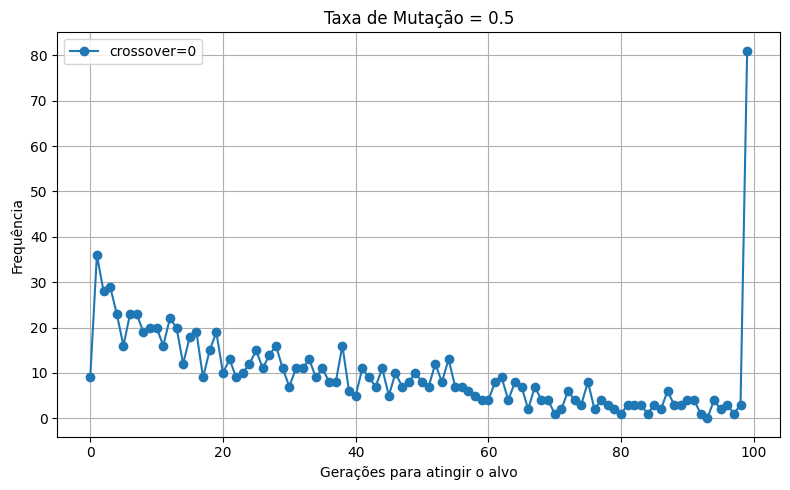

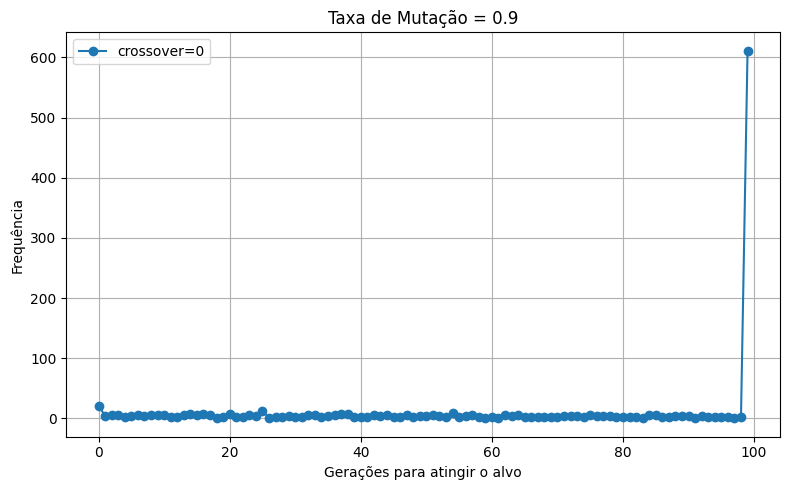

In [79]:
# Apenas mutação
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates = [0.01, 0.05, 0.09, 0.1, 0.5, 0.9]
crossover_rates = [0]
n_runs = 1_000

results = run_experiments(mutation_rates, crossover_rates, n_runs)

# Gera os gráficos
for m in mutation_rates:
    plt.figure(figsize=(8, 5))
    for c in crossover_rates:
        gens_list = results[(m, c)]
        # Usa np.histogram para bins dinamicamente
        min_gen, max_gen = np.min(gens_list), np.max(gens_list)
        counts, bins = np.histogram(gens_list, bins=range(min_gen, max_gen + 2))
        x = bins[:-1]
        plt.plot(x, counts, marker='o', label=f'crossover={c}')

    plt.title(f'Taxa de Mutação = {m}')
    plt.xlabel('Gerações para atingir o alvo')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


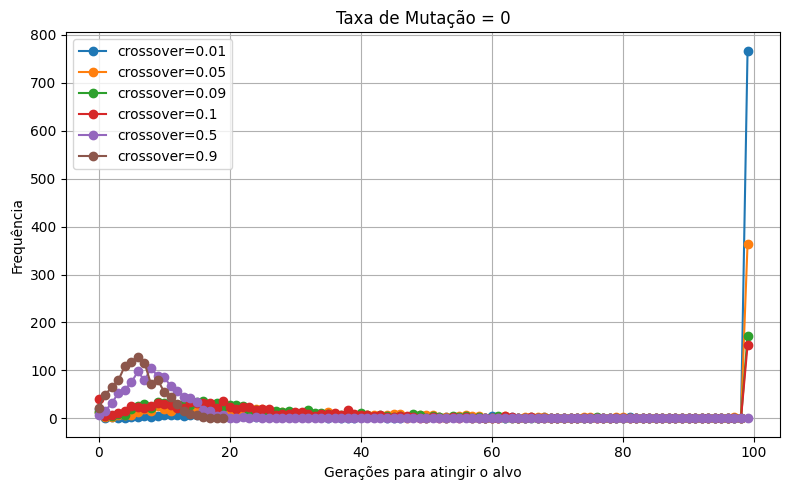

In [80]:
# Apenas crossover
target_pattern = [1,1,1,1,0,1,1,0,1,1,1,1]
mutation_rates = [0]
crossover_rates = [0.01, 0.05, 0.09, 0.1, 0.5, 0.9]
n_runs = 1_000

results = run_experiments(mutation_rates, crossover_rates, n_runs)

# Gera os gráficos
for m in mutation_rates:
    plt.figure(figsize=(8, 5))
    for c in crossover_rates:
        gens_list = results[(m, c)]
        # Usa np.histogram para bins dinamicamente
        min_gen, max_gen = np.min(gens_list), np.max(gens_list)
        counts, bins = np.histogram(gens_list, bins=range(min_gen, max_gen + 2))
        x = bins[:-1]
        plt.plot(x, counts, marker='o', label=f'crossover={c}')

    plt.title(f'Taxa de Mutação = {m}')
    plt.xlabel('Gerações para atingir o alvo')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
